# Community Involvement Guidance Using RAG-based Engine


# Install pandas library because it helps in loading, filtering, and processing our dataset

In [ ]:
!pip install -q pandas

# Install openpyxl library because it helps in reading/writing our excel file dataset

In [ ]:
!pip install -q openpyxl

# Install sentence-transformers library for feature extraction

In [ ]:
!pip install -q sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 25.4 MB/s eta 0:00:00


# Install langchain because it is a framework for building with LLMs

In [ ]:
!pip install -q langchain

# Install faiss-cpu because it helps vector similarity search using semantic embedding

In [ ]:
!pip install -q faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 42.4 MB/s eta 0:00:00


# We upload files(dataset) from our local device to the Colab.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving community.xlsx to community.xlsx


# Reads our dataset excel file named community.xlsx and displays the first 5 rows of the DataFrame.

In [ ]:
import pandas as pd

df = pd.read_excel("community.xlsx")
df.head()

,Interest_Area,Level,GuideLine_Text
0,recycling,Beginner,Begin by learning how to sort common household...
1,teaching,Beginner,Start by choosing a topic you feel confident a...
2,water conservation,Beginner,Reuse water from washing vegetables for wateri...
3,tree planting,Beginner,Start by choosing a suitable location in your ...
4,saving electricity,Beginner,Start by organizing a group talk to explain wh...


# We rename columns to shorter and consistent names and removes any rows where 'topic', 'user_level', or 'guideline_text' is missing (NaN) by using dropna.
We removes extra spaces by using strip() and converts all text to lowercase by using lower() because it helps with consistent filtering/searching.

In [ ]:
df = (
    df
    .rename(columns={
        'Interest_Area': 'topic',
        'Level': 'user_level',
        'GuideLine_Text': 'guideline_text'
    })
    .dropna(subset=['topic', 'user_level', 'guideline_text'])
)

# Normalise text for filtering
df['topic'] = df['topic'].str.strip().str.lower()
df['user_level'] = df['user_level'].str.strip().str.lower()

print("Unique topics:", df['topic'].unique())
print("Rows:", len(df))


Unique topics: ['recycling' 'teaching' 'water conservation' 'tree planting'
 'saving electricity' 'cleaning public space' 'plastic free'
 'mental healing' 'helping elderly people' 'supporting local farmers'
 'community storytelling' 'leadership' 'public speaking' 'donation'
 'environment' 'clean water access' 'volunteering' 'child nutrition'
 'digital skills' 'disaster prep' 'book sharing' 'fundraising'
 'first aid training' 'road safety campaign' 'anti-bullying'
 'language tutoring' 'climate change' 'peaceful conflict resolution'
 'no poverty' 'gardening' 'gender equality' 'energy saving'
 'disability awareness' 'ocean pollution' 'basic health check'
 'clean water' 'food sharing' 'waste management' 'public safety'
 'youth education' 'plastic reduction' 'local farming' 'health awareness'
 'energy saving resource' 'planting' 'air pollution' 'beach cleanup'
 'urban gardening' 'biodiversity' 'green spaces' 'solar power'
 'flood prevention' 'organic farming' 'wildlife protection'
 'forest 

#"all-MiniLM-L6-v2" is embedding model that converts text into dense vectors.
This code helps to understand meaning of user input (because of sentence embeddings).
Quickly search through thousands of guidelines using FAISS.
Return the most relevant steps to the user.


In [ ]:
!pip install -U langchain-community
!pip install -U langchain-huggingface

from sentence_transformers import SentenceTransformer
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS

embedder = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

vector_db = FAISS.from_texts(
    texts      = df['guideline_text'].tolist(),
    embedding  = embedder,
    metadatas  = df[['topic', 'user_level']].to_dict(orient='records')
)

vector_db.save_local('/content/guide_index')
print("Index built & saved")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Index built & saved


#This function returns a retriever object that is used to search for relevant guidelines based on a specific topic and user_level

In [ ]:
def get_retriever(topic: str, level: str, k: int = 4):
    return vector_db.as_retriever(
        search_kwargs={
            "k": k,
            "filter": {
                "topic": topic.lower(),
                "user_level": level.lower()
            }
        }
    )

We load a pre-trained text generation model (FLAN-T5 Large) from Hugging Face

We prepare tokenizer and model for processing text

We create a text generation pipeline (limits output length, deterministic results)

Wrap the pipeline in LangChain for easy integration in AI apps

In [ ]:
from langchain.llms import HuggingFacePipeline
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, pipeline

model_name = "google/flan-t5-large"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
hf_model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Create the pipeline
pipe = pipeline("text2text-generation",
                model=hf_model,
                tokenizer=tokenizer,
                max_new_tokens=256,
                do_sample=False)

# Wrap with LangChain
llm = HuggingFacePipeline(pipeline=pipe)

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Device set to use cpu
/tmp/ipython-input-1285103233.py:18: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=pipe)


# Main Function
It retrieves relevant information from a vector database and creates a customized prompt, and send the prompt to a language model (LLM) to generate the final guidelines.


In [ ]:
from langchain.prompts import PromptTemplate
from transformers import AutoTokenizer
from textwrap import dedent

# Load tokenizer once
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-large")

# prompt
prompt_tmpl = PromptTemplate(
    input_variables=["context", "topic", "level", "extra"],
    template=dedent("""
        Using the following information, write up to 6 simple, numbered steps for a {level} learner interested in {topic}.

        Context:
        {context}

        Extra focus: {extra}

        Steps:
    """).strip()
)

def truncate_to_fit(prompt_template: str, context: str, topic: str, level: str, extra: str, max_tokens: int = 512) -> str:
    dummy_context = ""
    base_prompt = prompt_template.format(context=dummy_context, topic=topic, level=level, extra=extra)
    base_token_count = len(tokenizer(base_prompt)["input_ids"])
    available = max_tokens - base_token_count
    ctx_tokens = tokenizer(context, truncation=True, max_length=available)
    return tokenizer.decode(ctx_tokens["input_ids"], skip_special_tokens=True)

def generate_guidelines(topic: str, level: str, extra: str = "") -> str:
    retriever = get_retriever(topic, level, k=4)
    docs = retriever.invoke(f"Topic: {topic}; Level: {level}; Extra: {extra}")
    raw_context = "\n".join(d.page_content for d in docs) if docs else "No matches found."
    context = truncate_to_fit(prompt_tmpl.template, raw_context, topic, level, extra)

    prompt = prompt_tmpl.format(context=context, topic=topic, level=level, extra=extra)

    # Debugging
    #print("\n--- Prompt sent to LLM ---")
    #print(prompt)
    #print("-------------------------\n")

    response = llm.invoke(prompt)
    return response.strip()

# testing
test_topic = "Youth councils"
test_level = "beginner"
test_extra = "focus on community"

print("Generated Guidelines:\n")
print(generate_guidelines(test_topic, test_level, test_extra))

🔍 Generated Guidelines:



/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Step 1: Encourage young people to form councils where they can share ideas and take part in community decisions. Step 2: Provide training to build their leadership, communication, and teamwork skills. Step 3: Ensure the youth council represents diverse voices and works closely with local leaders. Step 4: Support youth-led projects that address community needs and create positive change.


In [ ]:
!pip install --quiet scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=10_000,
    ngram_range=(1,2),
    stop_words='english'
)
X_tfidf = tfidf.fit_transform(df['guideline_text'])

print("TF‑IDF matrix shape:", X_tfidf.shape)   # (rows, vocab_size)
# Now X_tfidf can feed classic ML models (log‑reg, SVM, etc.)

from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

model = SentenceTransformer("all-MiniLM-L6-v2")  # small & fast
embeddings = model.encode(df['guideline_text'].tolist(), show_progress_bar=True)

print("Embeddings shape:", embeddings.shape)     # (rows, 384)

# Build a FAISS index for fast similarity search
d = embeddings.shape[1]
index = faiss.IndexFlatL2(d)
index.add(np.array(embeddings).astype("float32"))

# query
query = "steps to do local planning tranning"
q_emb = model.encode([query])
D, I = index.search(np.array(q_emb).astype("float32"), k=5)
print("\nTop‑5 closest guideline rows:")
print(df.iloc[I[0]][['topic', 'user_level', 'guideline_text']])

TF‑IDF matrix shape: (999, 10000)


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Embeddings shape: (999, 384)

Top‑5 closest guideline rows:
                       topic   user_level  \
246  local planning training  experienced   
245  local planning training     beginner   
229           urban planning     beginner   
230           urban planning  experienced   
281        land use planning     beginner   

                                        guideline_text  
246  Start by tailoring local planning training to ...  
245  Begin by teaching community members the basics...  
229  Begin by involving community members in planni...  
230  Start by involving community members early in ...  
281  Begin by involving community members in discus...  


# Visualization graph to represent user_level

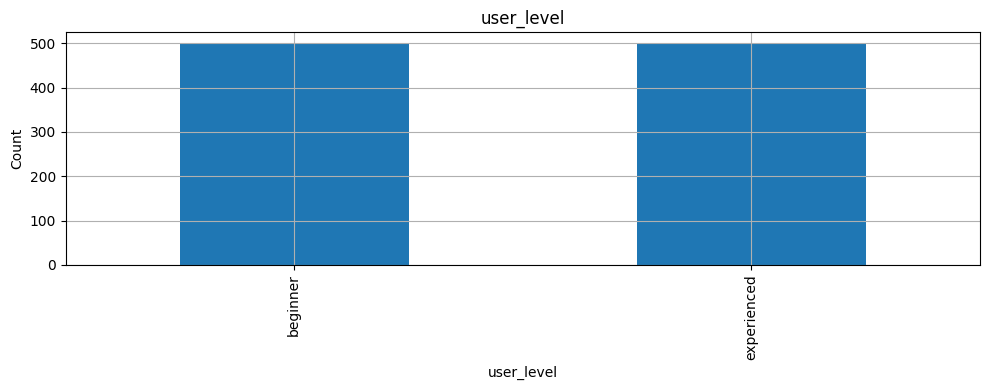

In [ ]:
import matplotlib.pyplot as plt

col = 'user_level'

df[col].value_counts().plot(kind='bar', figsize=(10, 4))
plt.title(f"{col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization graph to represent Top 10 most common topics

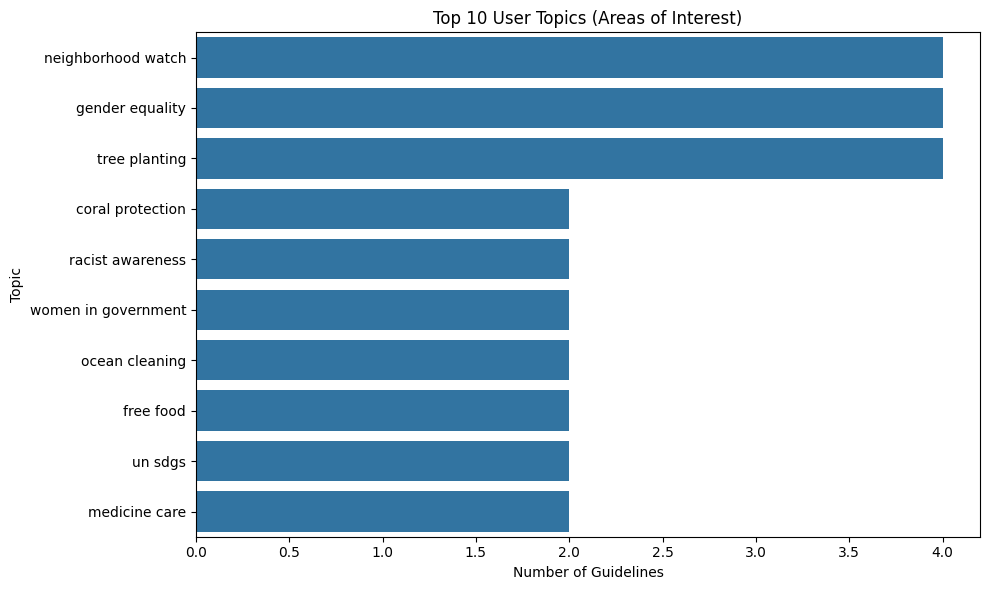

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count top 10 most common topics
top_topics = df['topic'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_topics.values, y=top_topics.index)
plt.title("Top 10 User Topics (Areas of Interest)")
plt.xlabel("Number of Guidelines")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()

# Graph to represent number of retrieved Guideline text words

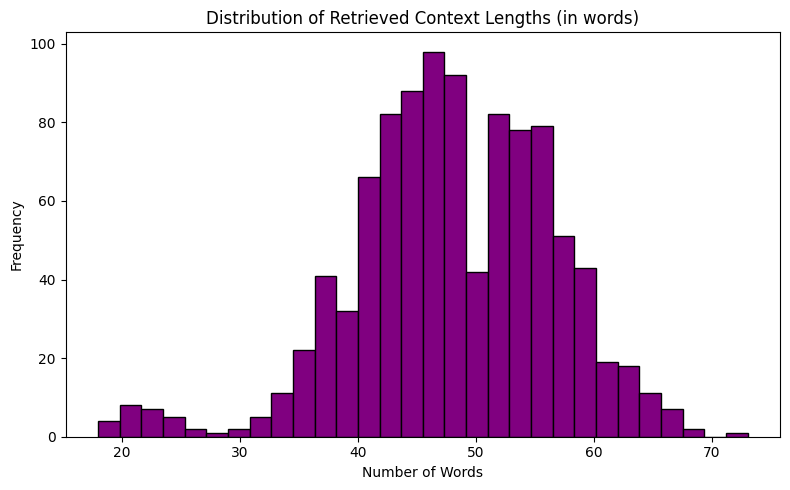

In [ ]:
def plot_context_length_hist(df):
    df['context_length'] = df['guideline_text'].astype(str).apply(lambda x: len(x.split()))

    plt.figure(figsize=(8, 5))
    plt.hist(df['context_length'], bins=30, color='purple', edgecolor='black')
    plt.title("Distribution of Retrieved Context Lengths (in words)")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_context_length_hist(df)

# Classification report and Confusion metric using RFC
We convert text data into numbers using TF‑IDF.

We divide data into 80% for training and 20% for testing.

We use Random Forest to learn from training data.

Classification Report(Random Forest Classifier):
              precision    recall  f1-score   support

    beginner       0.82      0.86      0.84        97
 experienced       0.86      0.83      0.84       103

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



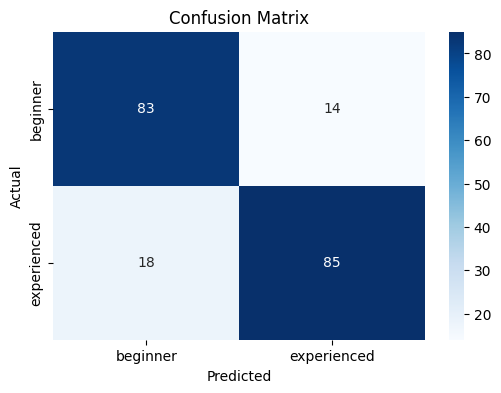

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

text_col = 'guideline_text'
label_col = 'user_level'

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df[text_col])
y = df[label_col]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)

print("Classification Report(Random Forest Classifier):")
print(report)


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report using LinearSVC

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import pandas as pd

text_col = 'guideline_text'
label_col = 'user_level'

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df[text_col])
y = df[label_col]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LinearSVC classifier
clf = LinearSVC()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)

print("Classification Report (LinearSVC):")
print(report)

Classification Report (LinearSVC):
              precision    recall  f1-score   support

    beginner       0.79      0.88      0.83        97
 experienced       0.87      0.78      0.82       103

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.82       200



# Classification report using Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train a Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Classification Report
print("Classification Report(Logistic Regression):")
print(classification_report(y_test, y_pred))

Classification Report(Logistic Regression):
              precision    recall  f1-score   support

    beginner       0.77      0.87      0.82        97
 experienced       0.86      0.76      0.80       103

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



# UI using Gradio

In [ ]:
import gradio as gr
import pandas as pd


def generate_guidelines(topic, level, extra):

    topic = topic.strip().lower()
    level = level.strip().lower()

    row = df[(df['topic'].str.lower() == topic) & (df['user_level'].str.lower() == level)]

    if row.empty:
        row = df[df['topic'].str.lower() == topic]

    if row.empty:
        similar = df[df['topic'].str.lower().str.contains(topic)]
        if not similar.empty:
            row = similar

    # Final fallback: any random guideline
    if row.empty:
        return "Sorry, no guideline found. Please try a different topic."

    # Take first matching row
    guideline = row.iloc[0]['guideline_text']

    # Add optional focus
    if extra.strip():
        guideline += f"\n\n🔍 Focus on: {extra.strip()}"

    return guideline

# Gradio UI
gr.Interface(
    fn=generate_guidelines,
    inputs=[
        gr.Textbox(label="Topic"),
        gr.Radio(["beginner", "experienced"], label="Level"),
        gr.Textbox(label="Extra Focus (optional)")
    ],
    outputs=gr.Textbox(label="Generated Guidelines"),
    title="Guideline Generator",
    description="Enter your area of interest and experience level to get personalized guidance."
).launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ea6b15a4526f724167.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
